In [1]:
# Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import kagglehub
import os
import sys


from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
from logger import Logger
from collector import Collector
from enricher import Enricher

/home/codespace/.python/current/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
logger = Logger()
df = pd.DataFrame()
logger.info('Main','main','Inicializar clase Logger')
collector = Collector(logger=logger)
enricher = Enricher(logger=logger)

In [3]:
df_1 =collector.collertor_data()
df_2=enricher.calcular_kpi(df_1)
df_2

,fecha,abrir,max,min,cerrar,cierre_ajustado,volumen,volatilidad
37,1 abr 2025,40.28,41.44,40.20,41.38,40.82,607.9,0.000000
203,1 ago 2024,33.12,33.42,32.67,32.82,25.49,183.6,0.000000
225,1 jul 2024,32.85,33.00,32.22,32.45,25.20,288.3,0.000000
16,1 may 2025,40.30,40.86,40.00,40.50,40.50,224.1,0.000000
138,1 nov 2024,32.14,32.45,31.66,31.66,25.22,99.3,4.755567
...,...,...,...,...,...,...,...,...
113,9 dic 2024,33.16,33.25,32.65,32.69,26.04,196.3,3.210973
220,9 jul 2024,33.34,33.72,33.34,33.59,26.08,233.6,3.150457
10,9 may 2025,41.20,41.74,40.91,41.16,41.16,334.6,4.215658
155,9 oct 2024,30.98,31.78,30.84,31.57,25.15,324.8,4.027788


In [4]:
df_3=enricher.formatear_fechas(df_2)
df_3

/workspaces/Proyecto_Integrado_V/src/maria_piv/enricher.py:20: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['fecha'] = pd.to_datetime(df['fecha'], errors='coerce', dayfirst=True)


,fecha,abrir,max,min,cerrar,cierre_ajustado,volumen,volatilidad
37,NaT,40.28,41.44,40.20,41.38,40.82,607.9,0.000000
203,NaT,33.12,33.42,32.67,32.82,25.49,183.6,0.000000
225,2024-07-01,32.85,33.00,32.22,32.45,25.20,288.3,0.000000
16,2025-05-01,40.30,40.86,40.00,40.50,40.50,224.1,0.000000
138,2024-11-01,32.14,32.45,31.66,31.66,25.22,99.3,4.755567
...,...,...,...,...,...,...,...,...
113,NaT,33.16,33.25,32.65,32.69,26.04,196.3,3.210973
220,2024-07-09,33.34,33.72,33.34,33.59,26.08,233.6,3.150457
10,2025-05-09,41.20,41.74,40.91,41.16,41.16,334.6,4.215658
155,2024-10-09,30.98,31.78,30.84,31.57,25.15,324.8,4.027788


In [5]:
df = df_3[["fecha", "cierre_ajustado"]]
df.set_index('fecha', inplace=True)
df.head()

,cierre_ajustado
fecha,
NaT,40.82
NaT,25.49
2024-07-01,25.20
2025-05-01,40.50
2024-11-01,25.22


#Visualización

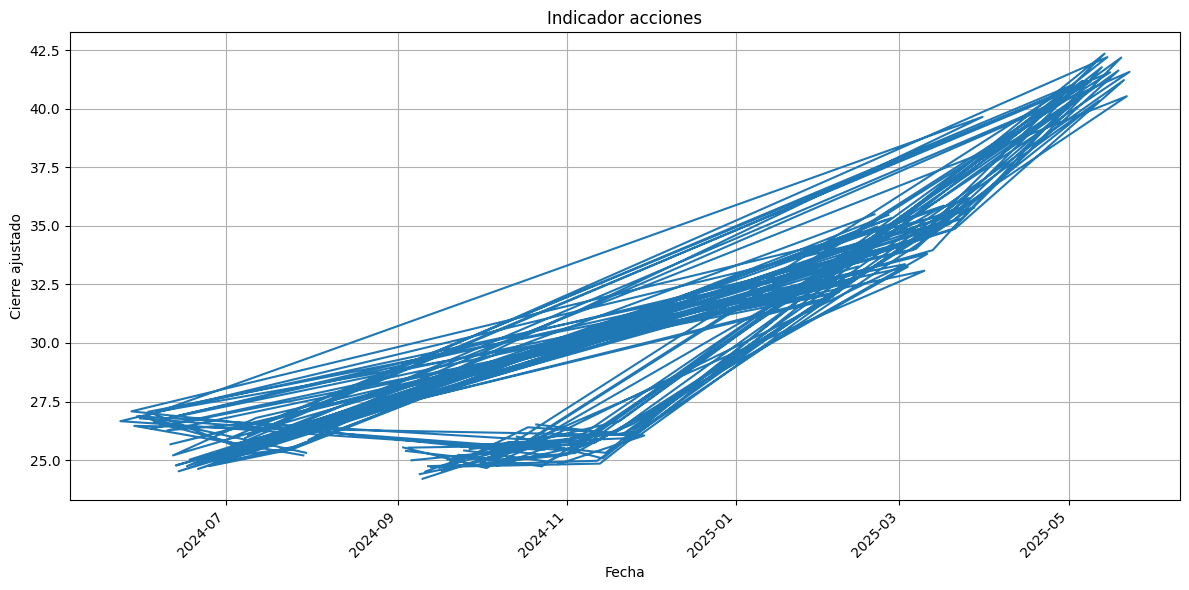

In [6]:
plt.figure(figsize=(12, 6))
df['cierre_ajustado'].plot(figsize=(12, 6), label='Cierre ajustado')
plt.title('Indicador acciones')
plt.xlabel('Fecha')
plt.ylabel('Cierre ajustado')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Análisis del Indicador de Acciones: Cierre Ajustado
La gráfica presenta el comportamiento del precio de cierre ajustado de una acción a lo largo del tiempo, desde mediados del año 2024 hasta mayo de 2025. El eje X representa la fecha de cada registro y el eje Y muestra el valor ajustado de cierre.

¿Qué es el "Cierre Ajustado"?
El cierre ajustado es una medida del precio de una acción que tiene en cuenta factores como dividendos, splits (división de acciones) y otras operaciones corporativas. Este valor permite realizar comparaciones más precisas del comportamiento histórico del activo, ya que refleja el impacto real sobre el valor del inversionista.

Observaciones Clave:
Tendencia ascendente clara: A lo largo del período analizado, el cierre ajustado muestra una subida sostenida, lo que indica una apreciación del valor de la acción. Esta tendencia puede interpretarse como una señal de crecimiento en el valor percibido por el mercado.

Estabilidad relativa en el segundo semestre de 2024: Entre julio y noviembre de 2024, los precios muestran oscilaciones, pero dentro de un rango relativamente acotado entre los 24 y 30 USD. Este comportamiento puede asociarse con una etapa de consolidación o con la espera de eventos económicos relevantes.

Aceleración del crecimiento en 2025: A partir de diciembre de 2024, el precio ajustado comienza a incrementarse con mayor pendiente, llegando hasta un valor cercano a los 42.5 USD en mayo de 2025. Este tipo de aceleración puede ser indicativa de un aumento en la demanda de la acción o expectativas positivas del mercado hacia la empresa.

Volatilidad natural del mercado: Aunque se observa una tendencia general positiva, hay fluctuaciones en los valores diarios. Esta volatilidad es esperada en el análisis bursátil y debe ser considerada al momento de evaluar el riesgo de inversión.

Conclusión:
La evolución positiva del cierre ajustado indica una mejora en el desempeño financiero o en la percepción del mercado sobre la empresa. Este tipo de análisis es útil para estudiar la rentabilidad histórica de una acción y tomar decisiones fundamentadas en ingeniería financiera, economía computacional o simulación de escenarios de inversión.

In [7]:
print(df.columns.tolist())


['cierre_ajustado']


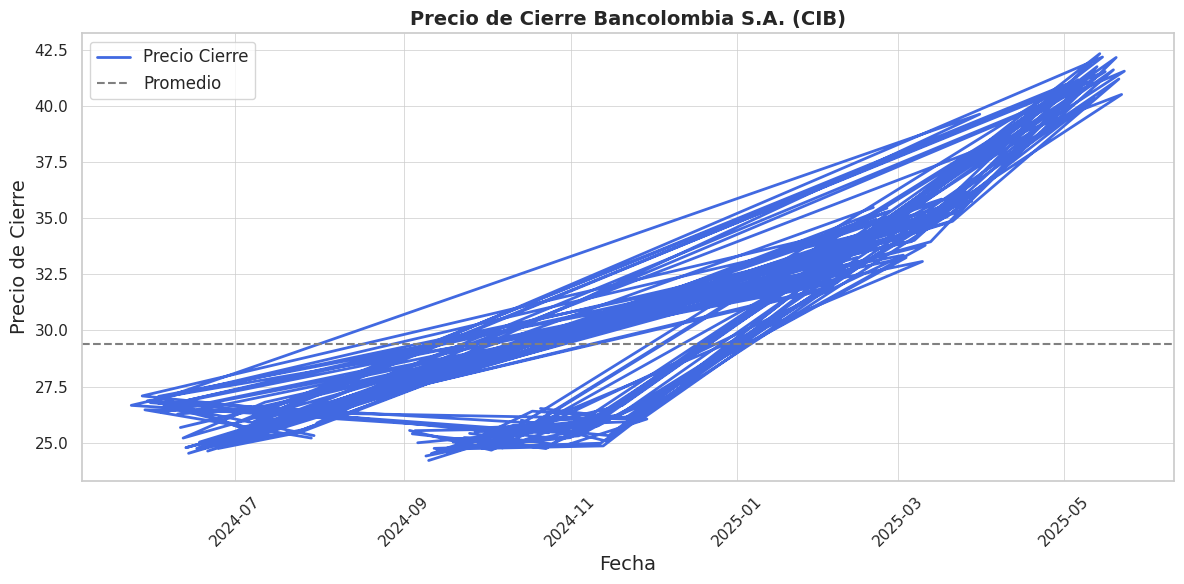

In [8]:
# Visualización con Seaborn
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Asumiendo que 'fecha' está en el índice o como columna:
# Si no está en el índice, usa df['fecha'] en vez de df.index
if 'fecha' in df.columns:
    x = df['fecha']
else:
    x = df.index

plt.plot(x, df['cierre_ajustado'], color='royalblue', linewidth=2, label='Precio Cierre')

plt.title('Precio de Cierre Bancolombia S.A. (CIB)', fontsize=14, fontweight='bold')
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Precio de Cierre', fontsize=14)

plt.axhline(y=df['cierre_ajustado'].mean(), color='gray', linestyle='--', label='Promedio')

plt.legend(loc='upper left', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='-', linewidth=0.5)
plt.tight_layout()
plt.show()



Análisis del Comportamiento del Precio de Cierre de la Acción Bancolombia S.A. (CIB)
La gráfica muestra la evolución del precio de cierre de la acción de Bancolombia S.A. (CIB) a lo largo del tiempo, desde mediados de 2024 hasta mayo de 2025. El eje X representa la fecha, mientras que el eje Y indica el precio de cierre en dólares estadounidenses.

La línea azul representa el valor del precio de cierre para cada día registrado.

La línea gris punteada indica el promedio general del precio de cierre durante todo el periodo observado.

Observaciones:
Tendencia general ascendente: Se observa un incremento en los precios de cierre a lo largo del tiempo, especialmente a partir de diciembre de 2024. Esto puede reflejar una recuperación económica, una buena percepción del mercado frente a Bancolombia, o factores externos como el comportamiento del dólar.

Variabilidad inicial: Durante los primeros meses (junio a octubre de 2024), los precios se mantienen mayormente por debajo del promedio. Esta zona de precios más bajos puede relacionarse con una etapa de incertidumbre o bajo rendimiento en el mercado.

Cruce con el promedio: A medida que avanza el tiempo, los precios comienzan a superar el promedio, indicando una etapa de crecimiento sostenido. Hacia marzo y mayo de 2025, los precios alcanzan máximos cercanos a los 42.5 USD, significativamente por encima del promedio que está alrededor de 29.5 USD.

Comportamiento oscilatorio: Aunque la tendencia general es positiva, hay varios altibajos reflejando la volatilidad natural del mercado bursátil.

Conclusión:
El análisis de esta gráfica permite concluir que la acción de Bancolombia S.A. ha presentado un buen desempeño bursátil en el periodo estudiado, con una tendencia clara al alza. Este tipo de análisis es fundamental para tomar decisiones de inversión basadas en datos históricos y para comprender el comportamiento del mercado financiero desde una perspectiva ingenieril.